## College Admissions Analyses using Cross Validation
#### Farzaneh Shirzadeh

In [15]:
import pandas as pd
df = pd.read_csv('College Admissions.csv')
df.head()

,admit,gre,gpa,rank
0,No,380,3.61,3
1,Yes,660,3.67,3
2,Yes,800,4.00,1
3,Yes,640,3.19,4
4,No,520,2.93,4


## 1. Format the admit column to numeric so it can be fit to a classification model. 

In [16]:
df['admit'] = df['admit'].map({'Yes':1, 'No':0})
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


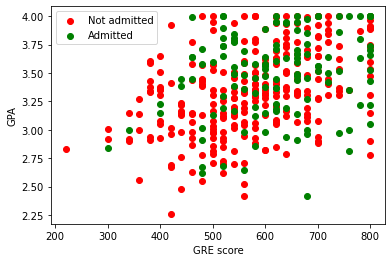

In [17]:
import matplotlib.pyplot as plt

# Extract features and target variable
X = df[['gre', 'gpa']]
y = df['admit']

# Create scatter plot
plt.scatter(X[y==0]['gre'], X[y==0]['gpa'], c='r', label='Not admitted')
plt.scatter(X[y==1]['gre'], X[y==1]['gpa'], c='g', label='Admitted')

# Add labels and legend
plt.xlabel('GRE score')
plt.ylabel('GPA')
plt.legend()

# Show the plot
plt.show()

## 2. Fit the data to a logistic regression model using scikit learn saving 20% of the data for testing. 

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#separate train and test data
x = df[['gre','gpa','rank']]
y = df['admit']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

## 3. Fit the data to a support vector machine model using scikit learn saving 20% of the data for testing.


In [19]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC 
# parameter C defines how large or how small you want to create the margin seperating classes og the target variable
model = SVC(C=10)
model.fit(x_train, y_train)

SVC(C=10)

## 4. Use scikit learn and the test data to create a confusion matrix for each model. Describe which model preforms better based on the confusion matrix and what you used to determine this. 

#### * logistic regression model *

In [20]:
from sklearn import metrics
# Make predictions on entire test data
y_pred_lr = logisticRegr.predict(x_test)
# Use score method to get accuracy of model. Same as accuracy_score function evaluation. 
print('logistic regression model Accuracy Score:', logisticRegr.score(x_test, y_test))
cm_lr = metrics.confusion_matrix(y_test, y_pred_lr )
print(cm_lr)

logistic regression model Accuracy Score: 0.6875
[[52  1]
 [24  3]]


#### * support vector machine model * 

In [21]:
y_pred = model.predict(x_test)
print('support vector machine model Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cm_svm = metrics.confusion_matrix(y_test, y_pred)
print(cm_svm)

support vector machine model Accuracy Score: 0.6625
[[53  0]
 [27  0]]


### explenation: 
Based on the confusion matrix and accuracy score, it seems like the logistic regression model performs better than the support vector machine model. The logistic regression model has a higher accuracy score (0.6875) compared to the SVM model (0.6625). Looking at the confusion matrix, the logistic regression model has a higher true positive rate (52)+ higher true negetive rate (3) compared to the SVM model (53+0). Additionally, the logistic regression model has a lower false negative rate (24) compared to the SVM model (27), which suggests that the logistic regression model is better at correctly identifying positive cases (admitted students) than the SVM model. Therefore, based on these metrics, the logistic regression model is a better choice for this particular problem.

## 5. For each of the above, use scikit learn to do a cross validation at 5 folds. Describe which model preforms better based on the cross validation and what you used to determine this.


#### * logistic regression model *

In [22]:
#creating vectors to store accuracy at each flod of CV
scores_l =[]
from sklearn.model_selection import cross_val_score
scores_l.append(cross_val_score(LogisticRegression(solver='liblinear'),x,y, cv = 5))

#logistic regression accuracy for each split 
print('logistic regression accuracy for each split: ',scores_l)
import numpy as np
print('logistic regression model accuracy: ', np.mean(scores_l))

logistic regression accuracy for each split:  [array([0.7125, 0.75  , 0.725 , 0.6625, 0.725 ])]
logistic regression model accuracy:  0.7150000000000001


#### * support vector machine model *

In [23]:
#svm accuracy for each split 
scores_svm = []
scores_svm.append(cross_val_score(SVC(C=10),x,y))
print('#svm accuracy for each split: ', scores_svm)
print('support vector machine model accuracy: ', np.mean(scores_svm))

#svm accuracy for each split:  [array([0.6875, 0.6875, 0.6875, 0.675 , 0.675 ])]
support vector machine model accuracy:  0.6824999999999999


### explenation: 
Based on cross-validation, the logistic regression model has an accuracy score of 0.715, while the support vector machine model has an accuracy score of 0.6825. Therefore, the logistic regression model performs better than the support vector machine model. This was determined by using cross-validation, which splits the data into multiple parts and trains the model on different combinations of these parts, providing a more reliable estimate of the model's performance.

## 6. In your own words, describe a difference between the information you were able to take from cross validation compared to the confusion matrix. 


### explenation: 
The confusion matrix and cross validation serve different purposes in evaluating a model's performance. The confusion matrix gives information on the model's ability to correctly predict true positives, true negatives, false positives, and false negatives, which helps evaluate accuracy and precision. In contrast, cross validation tests a model's generalization ability on different subsets of data and helps estimate performance on new data and identify overfitting. The main difference between the two is the type of information they provide and their primary use in evaluating a model's performance.

## 7. Choosing two of the four options from the rank column, repeat questions 2 – 5 and compare your results.

In [24]:
df_filtered = df[df['rank'].isin([1,2])]
df_filtered .head()

,admit,gre,gpa,rank
2,1,800,4.00,1
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
9,0,700,3.92,2


# Confusion Matrix

#### * logistic regression model *

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_filtered[['gre', 'gpa', 'rank']]
Y = df_filtered['admit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
logisticRegr = LogisticRegression(solver = 'liblinear')
logisticRegr.fit(x_train, y_train)

from sklearn import metrics
# Make predictions on entire test data
y_pred_lr = logisticRegr.predict(x_test)
# Use score method to get accuracy of model. Same as accuracy_score function evaluation. 
print('logistic regression model Accuracy Score:', logisticRegr.score(x_test, y_test))
cm_lr = metrics.confusion_matrix(y_test, y_pred_lr )
print(cm_lr)

logistic regression model Accuracy Score: 0.5581395348837209
[[21  7]
 [12  3]]


#### * support vector machine model *

In [26]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC 
# parameter C defines how large or how small you want to create the margin seperating classes og the target variable
model = SVC(C=10)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print('support vector machine model Accuracy Score:', metrics.accuracy_score(y_test,y_pred))
cm_svm = metrics.confusion_matrix(y_test, y_pred)
print(cm_svm)

support vector machine model Accuracy Score: 0.627906976744186
[[24  4]
 [12  3]]


# Cross Validation

#### * Logistic Regression *

In [27]:
#creating vectors to store accuracy at each flod of CV
scores_l =[]
from sklearn.model_selection import cross_val_score
scores_l.append(cross_val_score(LogisticRegression(solver='liblinear'),X,Y, cv = 5))
#logistic regression accuracy for each split 
print('logistic regression accuracy for each split: ',scores_l)
import numpy as np
print('logistic regression model accuracy: ', np.mean(scores_l))

logistic regression accuracy for each split:  [array([0.55813953, 0.65116279, 0.71428571, 0.52380952, 0.66666667])]
logistic regression model accuracy:  0.6228128460686599


#### * support vector machine model *

In [28]:
#svm accuracy for each split 
scores_svm = []
scores_svm.append(cross_val_score(SVC(C=10),X,Y))
print('svm accuracy for each split: ', scores_svm)
print('support vector machine model accuracy: ', np.mean(scores_svm))

svm accuracy for each split:  [array([0.58139535, 0.58139535, 0.5952381 , 0.57142857, 0.5952381 ])]
support vector machine model accuracy:  0.584939091915836


### a.	How has the accuracy of the model changed when this is accounted for?

In the second scenario, the accuracy of both the logistic regression and support vector machine models decreased when cross-validation was taken into account. However, the logistic regression model continued to perform better than the SVM model in terms of accuracy. The confusion matrix showed that the logistic regression model had a lower accuracy score but had a better true positive rate compared to the SVM model, which had a higher accuracy score but a lower true positive rate. It is important to note that the small size of the dataset may have affected the performance of both models, and additional analysis may be required to determine the optimal model for this problem.